# Newtonian Pendulum
The pendulum object is one of the physics objects. This notebook runs through a couple of examples of initilizing the pendulum class, creating realizations with and without noise, and plotting the result.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from deepbench.physics_object import Pendulum

## The first step is to initilize the pendulum class
Inputs include the arm length, the starting angle, and the acceleration due to gravity. The acceleration due to gravity is not required if newton's gravitational constant and phi planet are provided. (We give an example of a hierarchical pendulum below.)
The pendulum class also requires 'noise_std_percent', which is a dictionary with the percent error for each parameter.

In [3]:
pendulum = Pendulum(
            pendulum_arm_length=10.0,
            starting_angle_radians=np.pi / 4,
            acceleration_due_to_gravity=9.8,
            noise_std_percent={
                "pendulum_arm_length": 0.0,
                "starting_angle_radians": 0.1,
                "acceleration_due_to_gravity": 0.1,
            },
        )

## Generate positions
Next, create an array of times and use the 'create_object' to draw the position at all these points in time. The noiseless parameter determines whether noise is added to the positions in time.

In [4]:
time = np.array(np.linspace(0, 50, 200))
pendulum_noisy = pendulum.create_object(time, noiseless=False)
pendulum_noiseless = pendulum.create_object(time, noiseless=True)

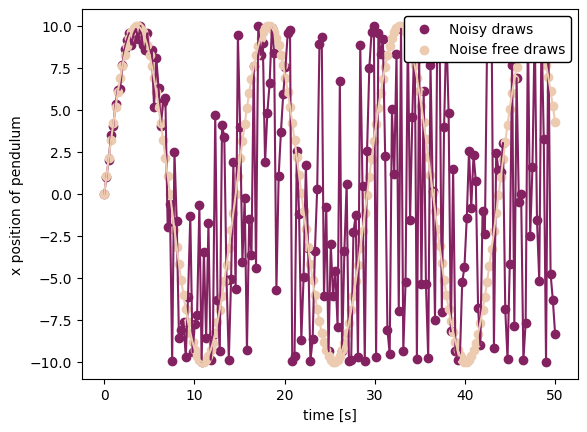

In [7]:
plt.clf()
plt.plot(time, pendulum_noisy, color = '#832161')
plt.scatter(time, pendulum_noisy, label = 'Noisy draws', color = '#832161')
plt.plot(time, pendulum_noiseless, color = '#EDCBB1')
plt.scatter(time, pendulum_noiseless, label = 'Noise free draws', color = '#EDCBB1')
legend = plt.legend(loc="upper right", edgecolor="black")
legend.get_frame().set_alpha(1.0)
plt.xlabel('time [s]')
plt.ylabel('x position of pendulum')
plt.show()